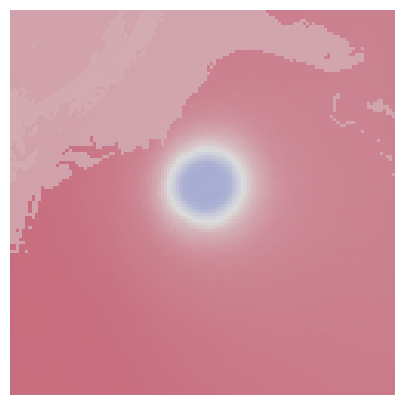

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import json

data = 0

# after loading the transfer function, 
# each subarray (control point) in an opacity function: [dataValue, opacity]
# each subarray (control point) in a color function: [dataValue, R(0-1), G(0-1), B(0-1)]
opacityTransferFunc = []
colorTransferFunc = []

##### data loading and setup/plot image
##### DO NOT modify this function
def Initialize(tfFileName):
    global data
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.axis('off')
    data = np.load('data.npy')
    
    f = open(tfFileName)
    jsn = json.load(f)
    jsn = jsn[0]

    opacityTransferFunc.clear()
    colorTransferFunc.clear()
    for i in range( 0, len(jsn['Points']), 4 ):
        tmp = []
        tmp.append(jsn['Points'][i+0])
        tmp.append(jsn['Points'][i+1])
        opacityTransferFunc.append(tmp)
    for i in range( 0, len(jsn['RGBPoints']), 4 ):
        tmp = []
        tmp.append(jsn['RGBPoints'][i+0])
        tmp.append(jsn['RGBPoints'][i+1])
        tmp.append(jsn['RGBPoints'][i+2])
        tmp.append(jsn['RGBPoints'][i+3])
        colorTransferFunc.append(tmp)


###### get data value: x and y are location on the image plane, z is coordinate along the pixel depth direction
###### In this data, x index: [0, 125), y index: [0, 125), z index: [0, 49)

def getInterpolation(val, func):
    assert len(func) >= 2

    idx = 1

    while not (func[idx][0] >= val >= func[idx - 1][0]):
        idx += 1

    pre = func[idx - 1]
    cur = func[idx]
    part = [pre[0], val, cur[0]]

    def interpolation(l, r):
        return (r - l) * (part[0] - part[1]) / (part[0] - part[2]) + l

    res = []

    for term in range(1, len(pre)):
        res.append(interpolation(pre[term], cur[term]))

    return res

def getValue( x, y, z ):
    global data
    return data[ z, x, y ] 

###########main 

### initialize and load a transfer function, the input argument is the transfer function file name
### after loading the opacity function and color function are stored in 'opacityTransferFunc' and 'colorTransferFunc'
Initialize('TF1.json')

##### 'img' is used to store the final image

img = np.zeros([125, 125, 3])


def getPointValue(x, y):
    res = [0, 0, 0]

    def getNextColor(pre, cur, alpha):
        res = []

        assert len(pre) == len(cur)

        for idx in range(len(pre)):
            res.append(pre[idx] * (1 - alpha) + cur[idx] * alpha)

        return res

    for z in range(49, -1, -1):
        d = getValue(x, y, z)
        alpha = getInterpolation(d, opacityTransferFunc)[0]
        color = getInterpolation(d, colorTransferFunc)
        res = getNextColor(res, color, alpha)

    return res


####### implement you direct volume rendering here and store the final image in "img"
for i in range(125):
    for j in range(125):
        img[i][j] = getPointValue(i, j)

####### show final image (img)
plt.imshow(img)
plt.show()
